In [14]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import torch 
import matplotlib.pyplot as plt
import pickle as pkl
pd.options.display.max_columns = 100

#logs = os.listdir(path)

best_loss ={}
dfs = {}
params = {'axes.labelsize': 35,
          'axes.titlesize': 35,
         }
plt.rcParams.update(params)
steplr = 50
scheduler = 'step'


In [2]:
def get_agg_data(names, curve_type='train'):
    folder_path = './logs/'
    paths = [os.path.join(folder_path, name) for name in names]      
    curves = {name: pkl.load(open(fp, 'rb')) for name, fp in zip(names, paths)}#get_data(names[opt])  
    df_agg = pd.DataFrame({ key : value[curve_type +'_score'] for key, value in curves.items()})
    return df_agg

def agg_plot(names, curve_type='train', labels = None, ylim=(80,101), xlim=None, loc = 'upper right', figsize=(10,8)):
    plt.figure(figsize=figsize)
    plt.ylim(ylim)
    if xlim:
      plt.xlim(xlim)
    opts = [label.lower() for label in labels]
  
    for opt, label in zip(opts, labels):
   
        df_agg = get_agg_data(names[opt], curve_type)
    
        acc = np.array(df_agg.mean(axis=1))
        std = np.array(df_agg.std(axis=1))    
        x = range(1, len(acc)+1)
        if 'theo' in label.lower():
            plt.plot(x, acc, '-', label=label, linewidth=2)
        else: 
            plt.plot(x, acc, '--', label=label, linewidth=1.5)
        plt.fill_between(x, acc-std, acc+std, alpha=0.15)
  
    plt.legend(fontsize=25, loc=loc)
    plt.grid()
    plt.title('{} SCORE'.format(curve_type.upper()))
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.xticks(fontsize =25)
    plt.yticks(fontsize =25)
    plt.tight_layout()    
    plt.show()

def get_best_acc(names, curve_type='train', labels = None):  
    opts = [label.lower() for label in labels]
  
    for opt, label in zip(opts, labels):
        df_agg = get_agg_data(names[opt], curve_type)
        print(opt, df_agg.min(axis=0).mean(), df_agg.min(axis=0).std())



    


# BS p=5 STEP LR = 50

## hs=1

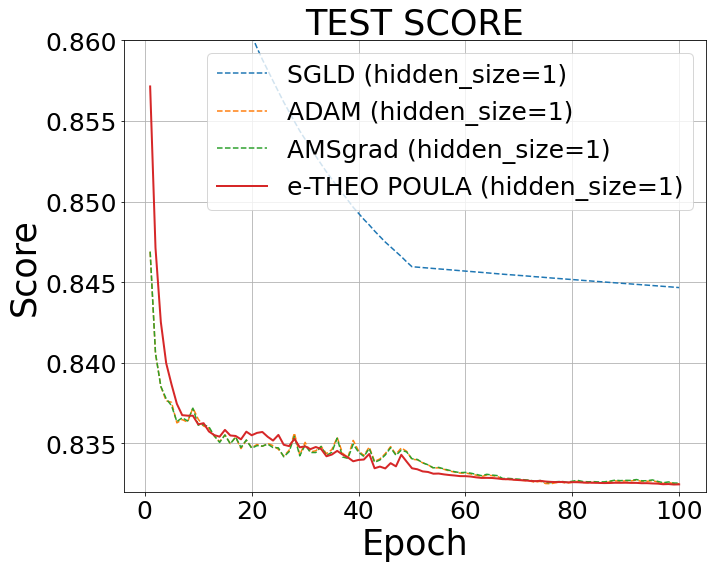

sgld (hidden_size=1) 0.8446674359119152 nan
adam (hidden_size=1) 0.8324970950555923 nan
amsgrad (hidden_size=1) 0.8325379359752626 nan
e-theo poula (hidden_size=1) 0.8324512206684903 nan


In [4]:
names = {
        'sgld (hidden_size=1)':['BS-p5-K40-hs1-bs128-sgld-seed111-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',                        
        ],                 
        'adam (hidden_size=1)':['BS-p5-K40-hs1-bs128-adam-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',                        
        ],
        'amsgrad (hidden_size=1)':['BS-p5-K40-hs1-bs128-amsgrad-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',                        
        ],                 
        'e-theo poula (hidden_size=1)':['BS-p5-K40-hs1-bs128-theopoula-seed111-lr0.1-eps0.01-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],      
        
        }
labels = [
          'SGLD (hidden_size=1)',
          'ADAM (hidden_size=1)',
          'AMSgrad (hidden_size=1)',
          'e-THEO POULA (hidden_size=1)',          
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.832, 0.86), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

# hs=5

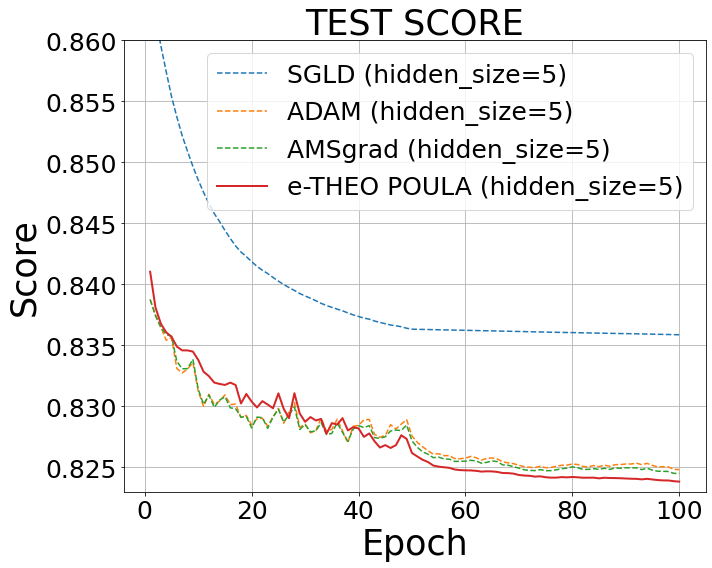

sgld (hidden_size=5) 0.8358721368757965 nan
adam (hidden_size=5) 0.82481558746694 nan
amsgrad (hidden_size=5) 0.8245039467921342 nan
e-theo poula (hidden_size=5) 0.8238343437919227 nan


In [5]:
names = {
        'sgld (hidden_size=5)':['BS-p5-K40-hs5-bs128-sgld-seed111-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'adam (hidden_size=5)':['BS-p5-K40-hs5-bs128-adam-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'amsgrad (hidden_size=5)':['BS-p5-K40-hs5-bs128-amsgrad-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'e-theo poula (hidden_size=5)':['BS-p5-K40-hs5-bs128-theopoula-seed111-lr0.1-eps0.01-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],      
        
        }
labels = [
          'SGLD (hidden_size=5)',
          'ADAM (hidden_size=5)',
          'AMSgrad (hidden_size=5)',
          'e-THEO POULA (hidden_size=5)',          
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.823, 0.86), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

# hs=10

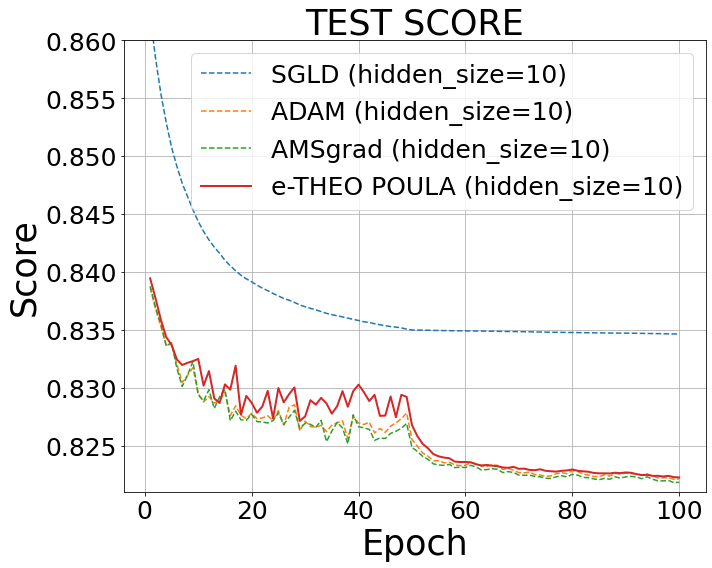

sgld (hidden_size=10) 0.8346313881447248 nan
adam (hidden_size=10) 0.8220733425501362 nan
amsgrad (hidden_size=10) 0.8217880956047331 nan
e-theo poula (hidden_size=10) 0.82224096315901 nan


In [6]:
names = {
        'sgld (hidden_size=10)':['BS-p5-K40-hs10-bs128-sgld-seed111-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'adam (hidden_size=10)':['BS-p5-K40-hs10-bs128-adam-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'amsgrad (hidden_size=10)':['BS-p5-K40-hs10-bs128-amsgrad-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'e-theo poula (hidden_size=10)':['BS-p5-K40-hs10-bs128-theopoula-seed111-lr0.05-eps0.0001-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],      
        
        }
labels = [
          'SGLD (hidden_size=10)',
          'ADAM (hidden_size=10)',
          'AMSgrad (hidden_size=10)',
          'e-THEO POULA (hidden_size=10)',          
         ]
#agg_plot(names, curve_type='train', labels=labels, ylim=(80, 100))
agg_plot(names, curve_type='test', labels=labels, ylim = (0.821, 0.86), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

# BS p=50 STEP LR = 50 

# hs = 1

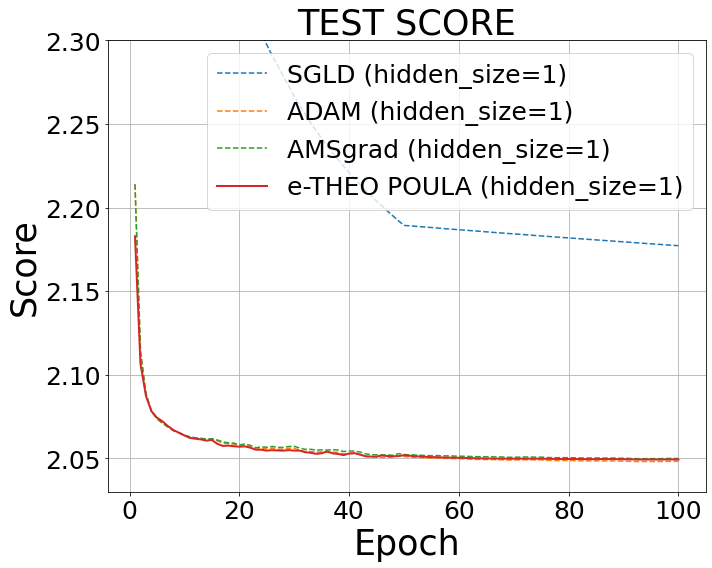

sgld (hidden_size=1) 2.1772089629526943 nan
adam (hidden_size=1) 2.0480564686343494 nan
amsgrad (hidden_size=1) 2.0498069372323466 nan
e-theo poula (hidden_size=1) 2.0492806035234494 nan


In [7]:
names = {
        'sgld (hidden_size=1)':['BS-p50-K40-hs1-bs128-sgld-seed111-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',                        
        ],                 
        'adam (hidden_size=1)':['BS-p50-K40-hs1-bs128-adam-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',                        
        ],
        'amsgrad (hidden_size=1)':['BS-p50-K40-hs1-bs128-amsgrad-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',                        
        ],                 
        'e-theo poula (hidden_size=1)':['BS-p50-K40-hs1-bs128-theopoula-seed111-lr0.05-eps0.0001-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],      
        }
labels = [
          'SGLD (hidden_size=1)',
          'ADAM (hidden_size=1)',
          'AMSgrad (hidden_size=1)',
          'e-THEO POULA (hidden_size=1)',          
         ]
#agg_plot(names, curve_type='train', labels=labels, ylim=(80, 100))
agg_plot(names, curve_type='test', labels=labels, ylim = (2.03, 2.3), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

# hs=5

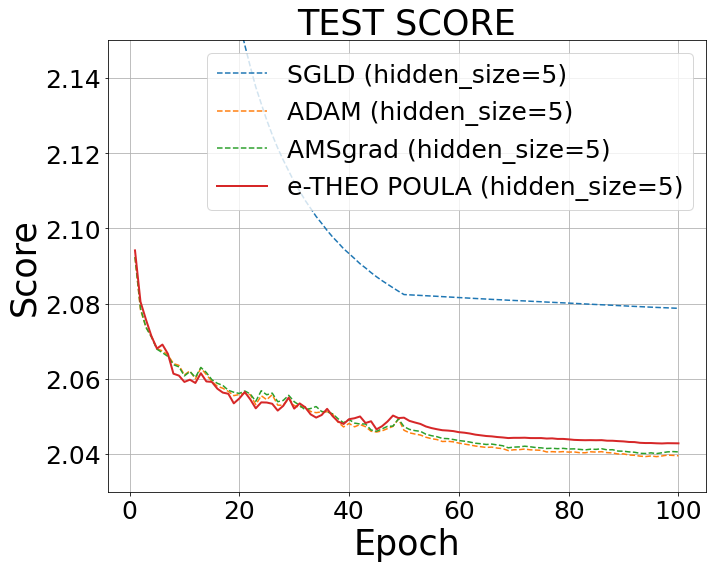

sgld (hidden_size=5) 2.078775556496037 nan
adam (hidden_size=5) 2.0393458580421973 nan
amsgrad (hidden_size=5) 2.0401487667542284 nan
e-theo poula (hidden_size=5) 2.0428526294810694 nan


In [8]:
names = {
        'sgld (hidden_size=5)':['BS-p50-K40-hs5-bs128-sgld-seed111-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'adam (hidden_size=5)':['BS-p50-K40-hs5-bs128-adam-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'amsgrad (hidden_size=5)':['BS-p50-K40-hs5-bs128-amsgrad-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'e-theo poula (hidden_size=5)':['BS-p50-K40-hs5-bs128-theopoula-seed111-lr0.05-eps0.0001-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],        
        }
labels = [
          'SGLD (hidden_size=5)',
          'ADAM (hidden_size=5)',
          'AMSgrad (hidden_size=5)',
          'e-THEO POULA (hidden_size=5)',          
         ]
#agg_plot(names, curve_type='train', labels=labels, ylim=(80, 100))
agg_plot(names, curve_type='test', labels=labels, ylim = (2.03, 2.15), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

## hs=20

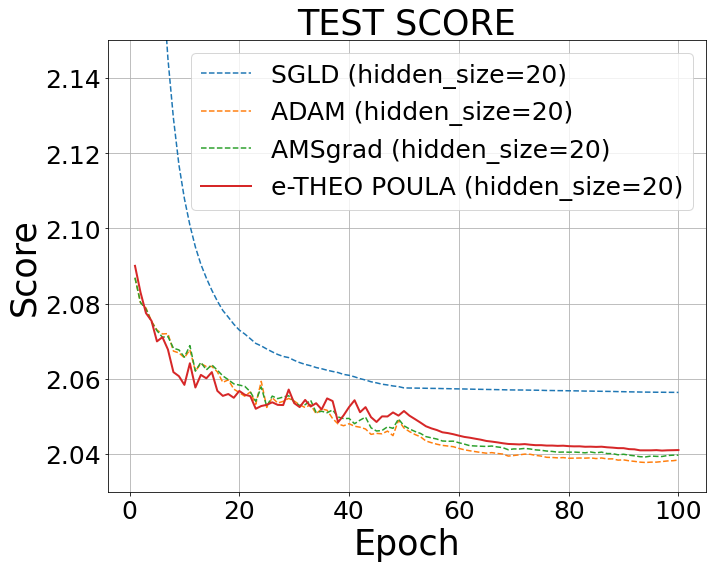

sgld (hidden_size=20) 2.056418962795716 nan
adam (hidden_size=20) 2.03778765085713 nan
amsgrad (hidden_size=20) 2.0392700424584587 nan
e-theo poula (hidden_size=20) 2.0409572273873917 nan


In [9]:
names = {
        'sgld (hidden_size=20)':['BS-p50-K40-hs20-bs128-sgld-seed111-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'adam (hidden_size=20)':['BS-p50-K40-hs20-bs128-adam-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'amsgrad (hidden_size=20)':['BS-p50-K40-hs20-bs128-amsgrad-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'e-theo poula (hidden_size=20)':['BS-p50-K40-hs20-bs128-theopoula-seed111-lr0.05-eps0.0001-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],      
        
        }
labels = [
          'SGLD (hidden_size=20)',
          'ADAM (hidden_size=20)',
          'AMSgrad (hidden_size=20)',
          'e-THEO POULA (hidden_size=20)',          
         ]
#agg_plot(names, curve_type='train', labels=labels, ylim=(80, 100))
agg_plot(names, curve_type='test', labels=labels, ylim = (2.03, 2.15), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

# BS p=100 STEP LR = 50 

# hs=1

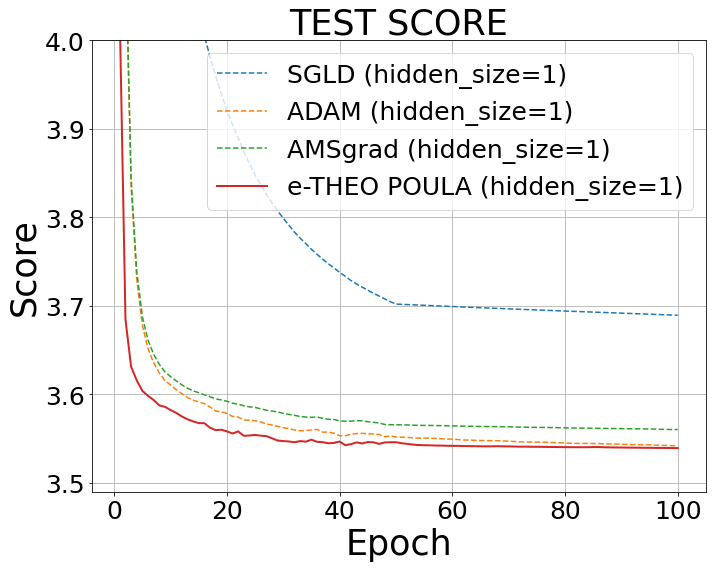

sgld (hidden_size=1) 3.6895139406404227 nan
adam (hidden_size=1) 3.542052332397617 nan
amsgrad (hidden_size=1) 3.5603326903584667 nan
e-theo poula (hidden_size=1) 3.5393725106173464 nan


In [10]:
names = {
        'sgld (hidden_size=1)':['BS-p100-K30-hs1-bs128-sgld-seed111-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',                        
        ],                 
        'adam (hidden_size=1)':['BS-p100-K30-hs1-bs128-adam-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',                        
        ],
        'amsgrad (hidden_size=1)':['BS-p100-K30-hs1-bs128-amsgrad-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',                        
        ],                 
        'e-theo poula (hidden_size=1)':['BS-p100-K30-hs1-bs128-theopoula-seed111-lr0.05-eps0.0001-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],      
        
        }
labels = [
          'SGLD (hidden_size=1)',
          'ADAM (hidden_size=1)',
          'AMSgrad (hidden_size=1)',
          'e-THEO POULA (hidden_size=1)',          
         ]
#agg_plot(names, curve_type='train', labels=labels, ylim=(80, 100))
agg_plot(names, curve_type='test', labels=labels, ylim = (3.49, 4.0), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

# hs =5

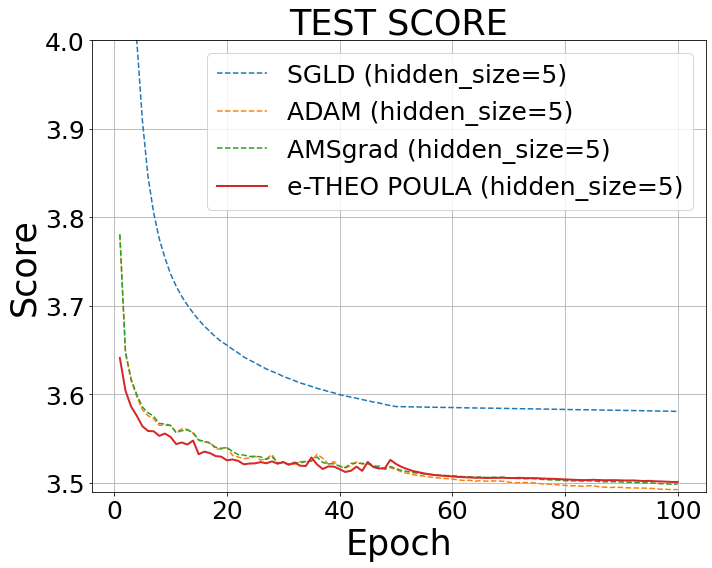

sgld (hidden_size=5) 3.5808690039398114 nan
adam (hidden_size=5) 3.4923270480407167 nan
amsgrad (hidden_size=5) 3.4984767784547928 nan
e-theo poula (hidden_size=5) 3.5011301339434846 nan


In [11]:
names = {
        'sgld (hidden_size=5)':['BS-p100-K30-hs5-bs128-sgld-seed111-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'adam (hidden_size=5)':['BS-p100-K30-hs5-bs128-adam-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'amsgrad (hidden_size=5)':['BS-p100-K30-hs5-bs128-amsgrad-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'e-theo poula (hidden_size=5)':['BS-p100-K30-hs5-bs128-theopoula-seed111-lr0.05-eps0.0001-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],      
        
        }
labels = [
          'SGLD (hidden_size=5)',
          'ADAM (hidden_size=5)',
          'AMSgrad (hidden_size=5)',
          'e-THEO POULA (hidden_size=5)',          
         ]
#agg_plot(names, curve_type='train', labels=labels, ylim=(80, 100))
agg_plot(names, curve_type='test', labels=labels, ylim = (3.49, 4.0), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

# hs = 20

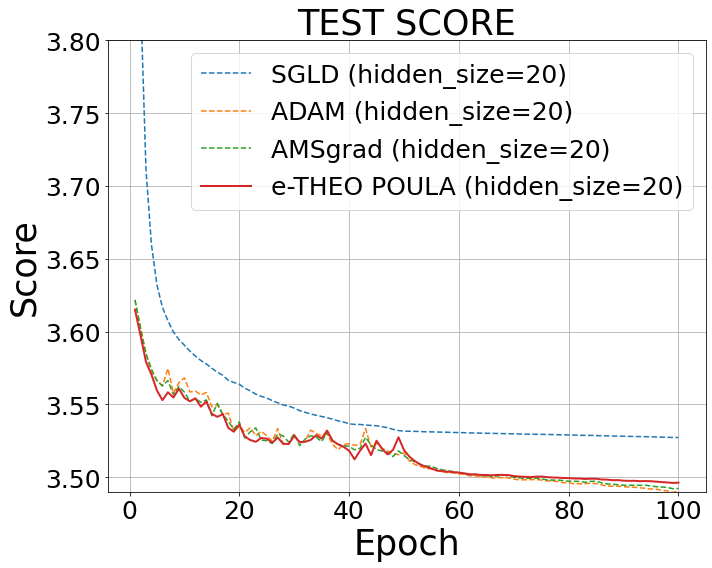

sgld (hidden_size=20) 3.5272986382779563 nan
adam (hidden_size=20) 3.489666967440749 nan
amsgrad (hidden_size=20) 3.4921283392650087 nan
e-theo poula (hidden_size=20) 3.496099518997895 nan


In [12]:
names = {
        'sgld (hidden_size=20)':['BS-p100-K30-hs20-bs128-sgld-seed111-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'adam (hidden_size=20)':['BS-p100-K30-hs20-bs128-adam-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'amsgrad (hidden_size=20)':['BS-p100-K30-hs20-bs128-amsgrad-seed111-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],                 
        'e-theo poula (hidden_size=20)':['BS-p100-K30-hs20-bs128-theopoula-seed111-lr0.1-eps0.01-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs100',
        ],      
        
        }
labels = [
          'SGLD (hidden_size=20)',
          'ADAM (hidden_size=20)',
          'AMSgrad (hidden_size=20)',
          'e-THEO POULA (hidden_size=20)',          
         ]
#agg_plot(names, curve_type='train', labels=labels, ylim=(80, 100))
agg_plot(names, curve_type='test', labels=labels, ylim = (3.49, 3.8), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

# **AR(1) p=30**

# **hs = 5**

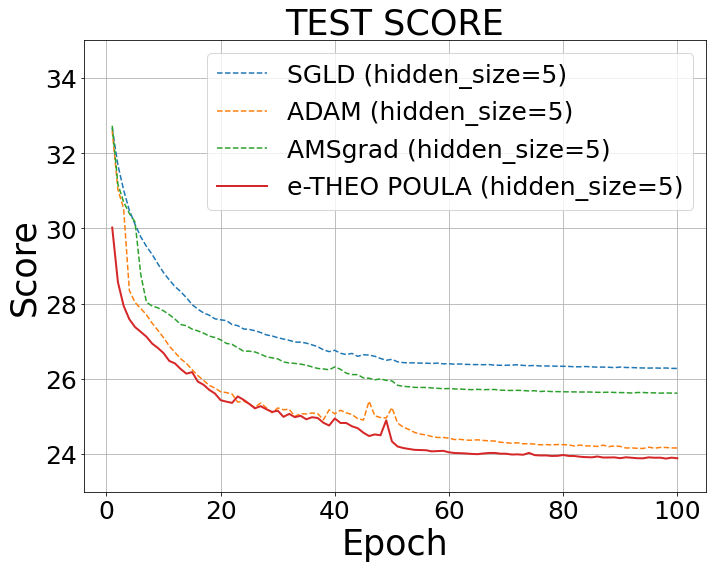

sgld (hidden_size=5) 26.280009525816155 nan
adam (hidden_size=5) 24.151676854386498 nan
amsgrad (hidden_size=5) 25.622770114447743 nan
e-theo poula (hidden_size=5) 23.883019635134644 nan


In [15]:
seed = 111
epochs = 100
bs = 128

names = {
        'sgld (hidden_size=5)':['AR-p30-K10-hs5-bs{}-sgld-seed{}-lr0.01-beta1.0e+12--wdecay0-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],                 
        'e-theo poula (hidden_size=5)':['AR-p30-K10-hs5-bs{}-theopoula-seed{}-lr0.01-eps1e-12-wdecay0-beta1.0e+12-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],                 
        'adam (hidden_size=5)':['AR-p30-K10-hs5-bs{}-adam-seed{}-lr0.01-betas0.9-0.999-wdecay0-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],        
        'amsgrad (hidden_size=5)':['AR-p30-K10-hs5-bs{}-amsgrad-seed{}-lr0.01-betas0.9-0.999-wdecay0-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],        
        }
labels = [
          'SGLD (hidden_size=5)',
          'ADAM (hidden_size=5)',
          'AMSgrad (hidden_size=5)',
          'e-THEO POULA (hidden_size=5)',
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (23, 35), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

# **hs=20**

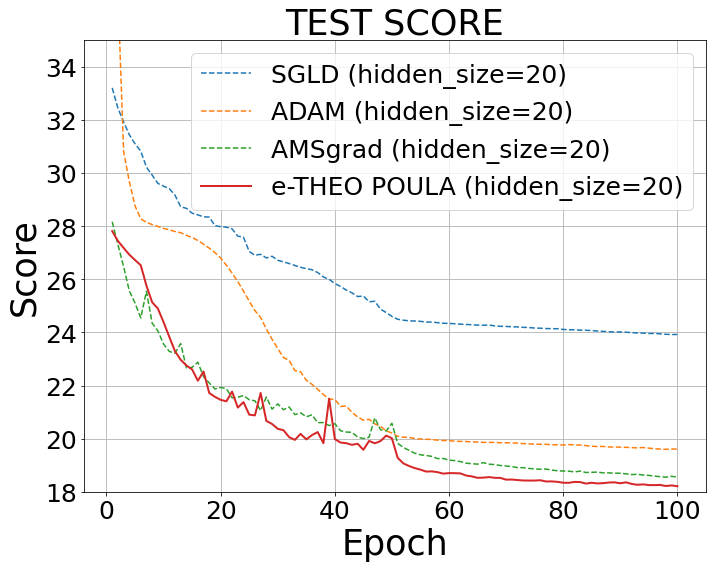

sgld (hidden_size=20) 23.923220939343544 nan
adam (hidden_size=20) 19.598494480973997 nan
amsgrad (hidden_size=20) 18.55065502373936 nan
e-theo poula (hidden_size=20) 18.20990619025267 nan


In [16]:
seed = 111
epochs = 100
bs = 128

names = {
        'sgld (hidden_size=20)':['AR-p30-K10-hs20-bs{}-sgld-seed{}-lr0.01-beta1.0e+12--wdecay0-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],                 
        'e-theo poula (hidden_size=20)':['AR-p30-K10-hs20-bs{}-theopoula-seed{}-lr0.01-eps1e-08-wdecay0-beta1.0e+12-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],                 
        'adam (hidden_size=20)':['AR-p30-K10-hs20-bs{}-adam-seed{}-lr0.001-betas0.9-0.999-wdecay0-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],        
        'amsgrad (hidden_size=20)':['AR-p30-K10-hs20-bs{}-amsgrad-seed{}-lr0.01-betas0.9-0.999-wdecay0-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],        
        }
labels = [
          'SGLD (hidden_size=20)',
          'ADAM (hidden_size=20)',
          'AMSgrad (hidden_size=20)',
          'e-THEO POULA (hidden_size=20)',
         ]
#agg_plot(names, curve_type='train', labels=labels, ylim=(80, 100))
agg_plot(names, curve_type='test', labels=labels, ylim = (18, 35), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 

# hs=50

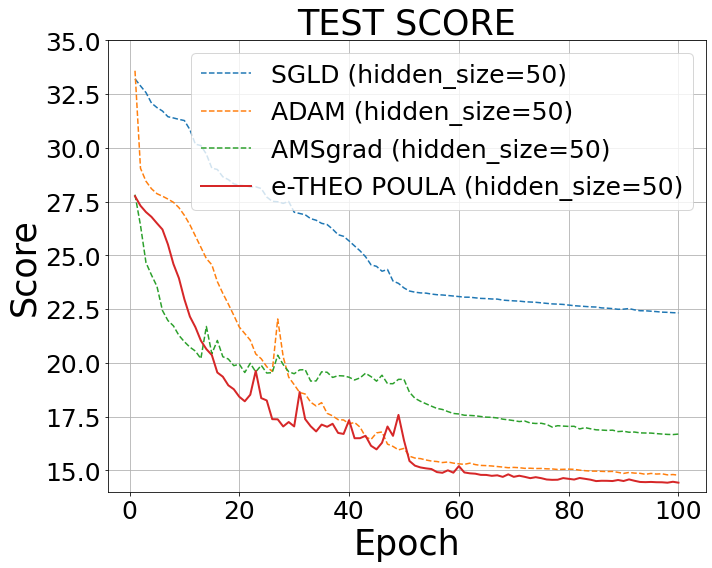

sgld (hidden_size=50) 22.32426547272431 nan
adam (hidden_size=50) 14.77354326948952 nan
amsgrad (hidden_size=50) 16.662847296498455 nan
e-theo poula (hidden_size=50) 14.423623421612907 nan


In [17]:
seed = 111
epochs = 100
bs = 128

names = {
        'sgld (hidden_size=50)':['AR-p30-K10-hs50-bs{}-sgld-seed{}-lr0.01-beta1.0e+12--wdecay0-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],                 
        'e-theo poula (hidden_size=50)':['AR-p30-K10-hs50-bs{}-theopoula-seed{}-lr0.01-eps0.01-wdecay0-beta1.0e+12-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],                 
        'adam (hidden_size=50)':['AR-p30-K10-hs50-bs{}-adam-seed{}-lr0.001-betas0.9-0.999-wdecay0-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],        
        'amsgrad (hidden_size=50)':['AR-p30-K10-hs50-bs{}-amsgrad-seed{}-lr0.01-betas0.9-0.999-wdecay0-scheduler{}-steplr{}-lrgamma0.1-epochs{}'.format(bs, seed, scheduler, steplr, epochs),
        ],        
        }
labels = [
          'SGLD (hidden_size=50)',
          'ADAM (hidden_size=50)',
          'AMSgrad (hidden_size=50)',
          'e-THEO POULA (hidden_size=50)',
         ]
#agg_plot(names, curve_type='train', labels=labels, ylim=(80, 100))
agg_plot(names, curve_type='test', labels=labels, ylim = (14, 35), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels) 